Running test case 0 with input '[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]'...
Correct!


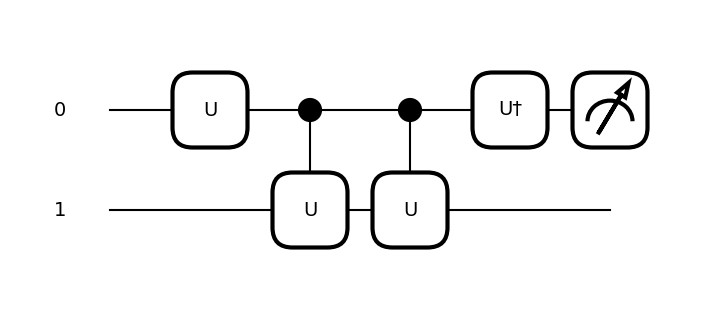

In [18]:
import json
import pennylane as qml
import pennylane.numpy as np
def W(alpha, beta):
    A = np.sqrt(alpha+beta)
    
    W_matrix = np.array([
        [np.sqrt(alpha), -np.sqrt(beta)],
        [np.sqrt(beta),np.sqrt(alpha)]])
    
    W_matrix = W_matrix/A

    return W_matrix

dev = qml.device('default.qubit', wires = 2)

@qml.qnode(dev)
def linear_combination(U, V,  alpha, beta):
    unitary = W(alpha,beta)
    qml.QubitUnitary(unitary, wires=0)
    qml.ControlledQubitUnitary(U, control_wires=[0], control_values="0", wires=1)
    qml.ControlledQubitUnitary(V, control_wires=[0], control_values="1", wires=1)
    qml.adjoint(qml.QubitUnitary)(unitary, wires=0)
    return qml.probs(wires=0)

def run(test_case_input: str) -> str:
    dev = qml.device('default.qubit', wires = 2)
    ins = json.loads(test_case_input)
    output = linear_combination(*ins)[0].numpy()
    qml.draw_mpl(linear_combination, wires=[0,1])(*ins)
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, atol=1e-3
    ), "Your circuit doesn't look quite right "

# These are the public test cases
test_cases = [
    ('[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]', '0.8901650422902458')
]
# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")